### General rules:
 * For all figures that you generate, remember to add meaningful labels to the axes (including units), and provide a legend and colorbar, if applicable.
 * Do not hard code constants, like number of samples, number of channels, etc in your program. These values should always be determined from the given data. This way, you can easily use the code to analyse other data sets.
 * Do not use high-level functions from toolboxes like scikit-learn.
 * Before submitting, check your code by executing: Kernel -> Restart & run all.
 * Replace *Template* by your *FirstnameLastname* in the filename, or by *Lastname1Lastname2* if you work in pairs.

# BCI-IL WS 2018/2019 - Exercise Sheet #02

#### Name(s):

In [2]:
% matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

## Preparation: Loading Data

In [4]:
fname = 'erp_hexVPsag.npz'
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)

## Exercise 1: Scatter Plot of 2D Features  (8 points)

Make a scatter plot of the two distributions - *targets* and *nontargets*, one dot for each trial. On the `x`-axis, plot the value of channel Cz at `t` = 380 ms, and at the `y`-axis the value of PO3 at `t` = 300 ms. *(You may refer to the results of sheet 01 for the reason of this choice.)*
Draw for both distributions the two principal axes, with the lengths of the axes being the standard deviation of the data in that direction. 
Draw also the corresponding ellipses. **Hint:** You can get that with a transformation of the unit circle as on the slide *Illustration of Multiplication ...*.

[[278.46462438 152.65616096]
 [152.65616096 460.31772203]]
[-1.7303901719698636, 36.752121328699495]


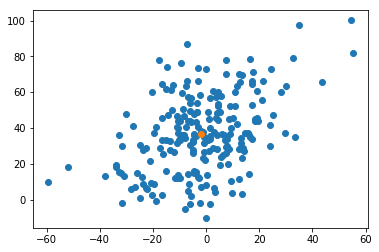

In [33]:
PO7time = np.int(300*(fs/1000))
CZtime = np.int(380*(fs/1000))
chans = ['Cz', 'PO7']

chan_1 = clab.index(chans[0])
chan_2 = clab.index(chans[1])

valuesCZ = [[],[]] #dim1:class, dim2:val at times 
valuesPO7 = [[],[]] #dim1:class, dim2:val at times 

for time,target in zip(mrk_pos,mrk_class):
    valuesCZ[target].append(cnt[chan_1][time + CZtime])
    valuesPO7[target].append(cnt[chan_2][time + PO7time])

plt.scatter(valuesCZ[0],valuesPO7[0])
#plt.scatter(valuesCZ[1],valuesPO7[1])

xTarget = np.array([valuesCZ[0],valuesPO7[0]])


cov = np.cov(valuesCZ[0],valuesPO7[0])
print(cov)
mean = [np.mean(xTarget[0]),np.mean(xTarget[1])]
print(mean)
plt.scatter(mean[0],mean[1])

## Exercise 2: Covariances and Eigenvalues  (7 points)

Calculate the channelwise covariance matrices (channel `x` channel) of the data for time point 380 ms for both classes (`np.cov`) and visualize them (`pl.imshow`). 
Perform an Eigenvalue decomposition (`np.linalg.eigh`) of the covariance matrices and plot (again class-wise) the eigenvalue spectrum. Then determine the four principle components (Eigenvectors) for each class that correspond to the largest Eigenvalues and display them as scalp maps (function `scalpmap` provided in the `bci_minitoolbox`).

In [47]:
addTime = np.int(380*(fs/1000))

values = [[[]]]

print(cnt.shape[0])

for time,target in zip(mrk_pos,mrk_class):
    for i in range(55):
        values[i][target].append(cnt[i][time+addTime])
        
print(values)

55


IndexError: list index out of range